### **Importing data and libraries**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('monthly_milk_production.csv')

### **Data correction**

In [3]:
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.set_index('Date',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [7]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


### **Visualization**

<Figure size 1500x800 with 0 Axes>

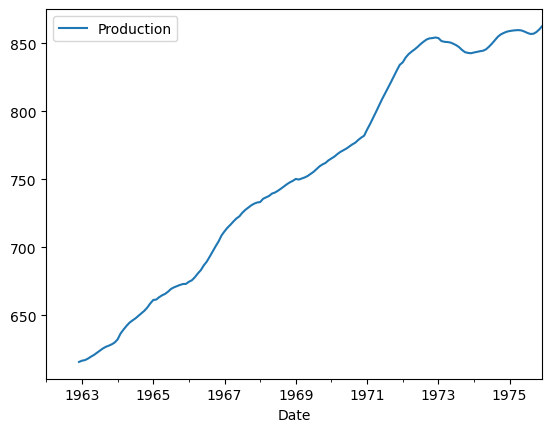

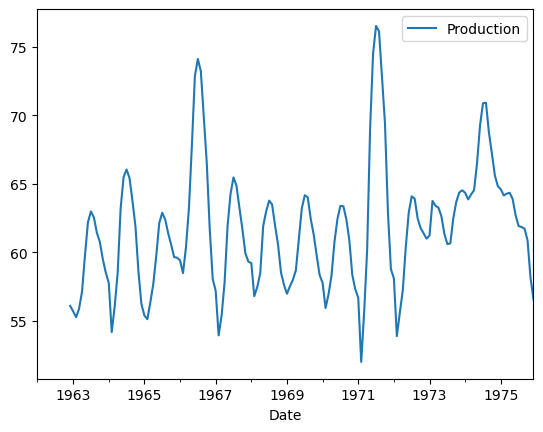

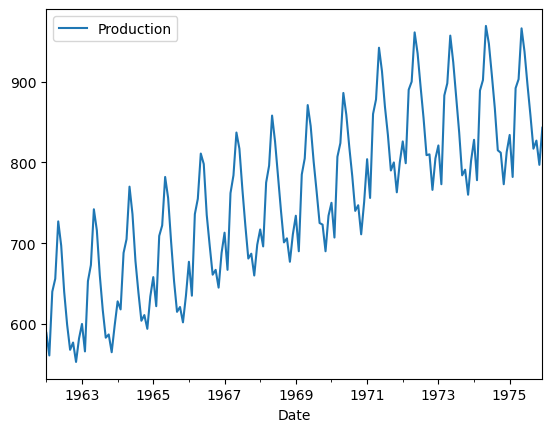

In [8]:
plt.figure(figsize= (15,8))

df.rolling(12).mean().plot(label = '12 Month rolling mean')
df.rolling(12).std().plot(label = '12 Month rolling std')
df.plot()
plt.legend()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 3000x1500 with 0 Axes>

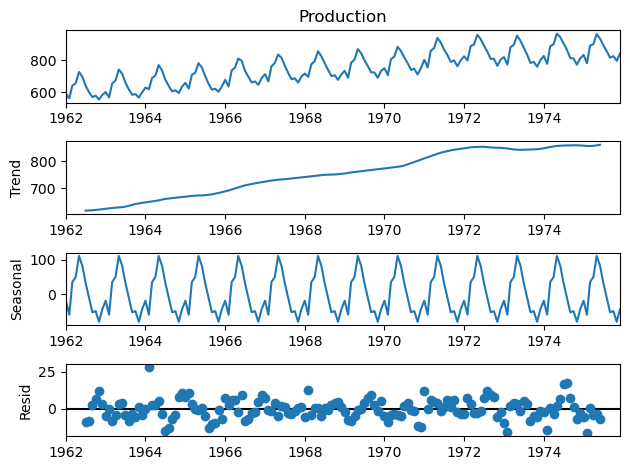

In [10]:
decom = seasonal_decompose(df['Production'])
fig = plt.figure(figsize = (30,15))
fig = decom.plot()

### **Stationary Test**

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
res = adfuller(df['Production'])

In [13]:
print('Result of ADF: ', res)

Result of ADF:  (-1.3038115874221272, 0.6274267086030327, 13, 154, {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}, 1115.1730447395112)


In [14]:
labels = ['adf_stats','p_value','lags','obser']
for value, labels in zip(res, labels):
  print(labels + ':' +str(value))

if res[1] <= 0.05:
  print('Reject Null hypo')

else:
  print('Accept null hypo')


adf_stats:-1.3038115874221272
p_value:0.6274267086030327
lags:13
obser:154
Accept null hypo


In [15]:
def adf_check(x):
  result = adfuller(x)
  print('Result of ADF: ', result)

  labels = ['adf_stats','p_value','lags','obser']
  for value, labels in zip(res, labels):
    print(labels + ':' +str(value))

  if res[1] <= 0.05:
    print('Reject Null hypo')

  else:
    print('Accept null hypo')

In [16]:
df['Production_diff'] = df['Production'] - df['Production'].shift(1)

In [17]:
adf_check(df['Production_diff'].dropna())

Result of ADF:  (-3.0549955586530464, 0.030068004001787604, 14, 152, {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}, 1107.6745114331075)
adf_stats:-1.3038115874221272
p_value:0.6274267086030327
lags:13
obser:154
Accept null hypo


<Axes: xlabel='Date'>

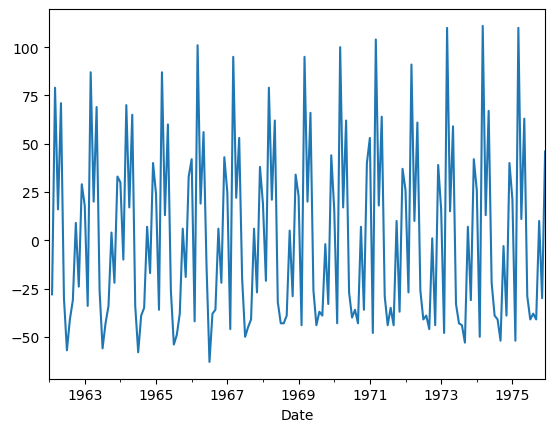

In [18]:
df['Production_diff'].plot()

### **Seasonal Difference**

<Axes: xlabel='Date'>

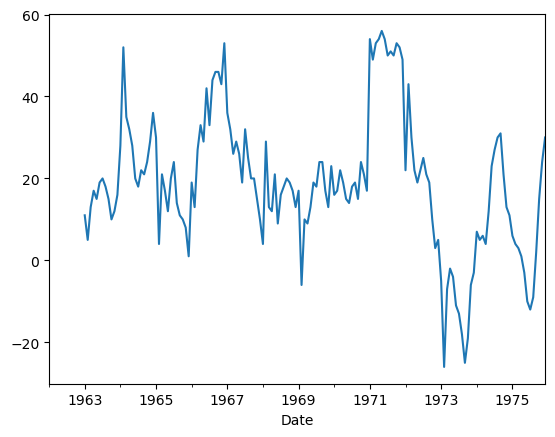

In [19]:
df['Seasonal_diff'] = df['Production']- df['Production'].shift(12)
df['Seasonal_diff'].plot()

In [20]:
adf_check(df['Seasonal_diff'].dropna())

Result of ADF:  (-2.335419314359401, 0.1607988052771126, 12, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 983.7689056486297)
adf_stats:-1.3038115874221272
p_value:0.6274267086030327
lags:13
obser:154
Accept null hypo


<Axes: xlabel='Date'>

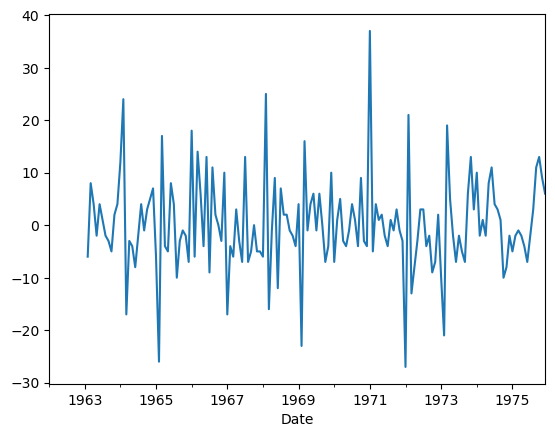

In [21]:
df['Seasonal_diff1'] = df['Production_diff']- df['Production_diff'].shift(12)
df['Seasonal_diff1'].plot()

### **PACF & ACF**

C:\Users\gawat\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


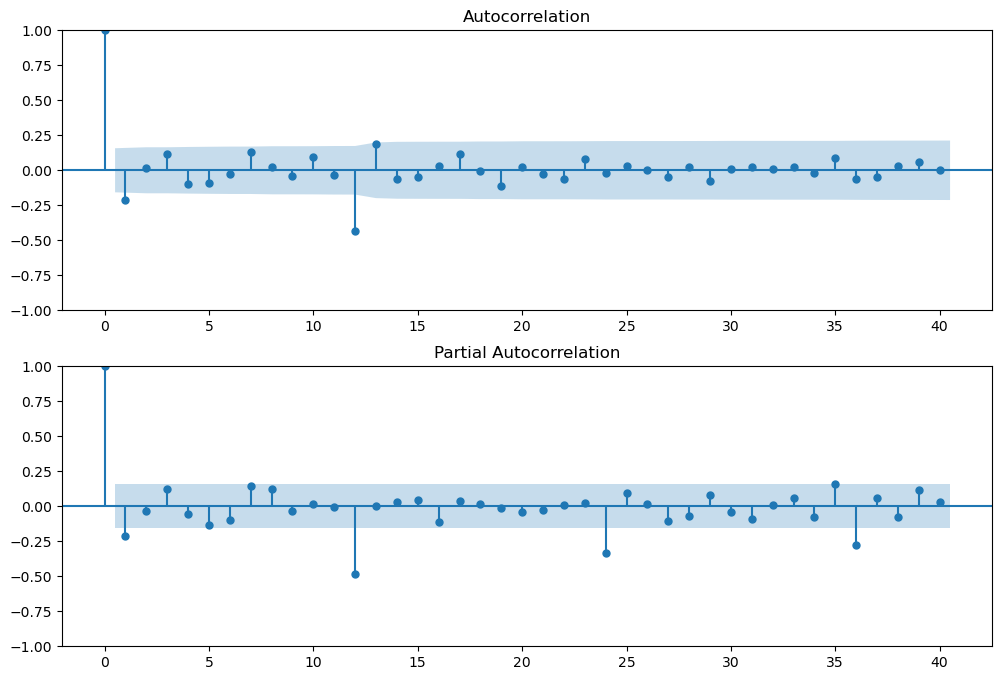

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal_diff1'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal_diff1'].iloc[13:], lags=40, ax=ax2)

### **Selection of model**

<Axes: xlabel='Date'>

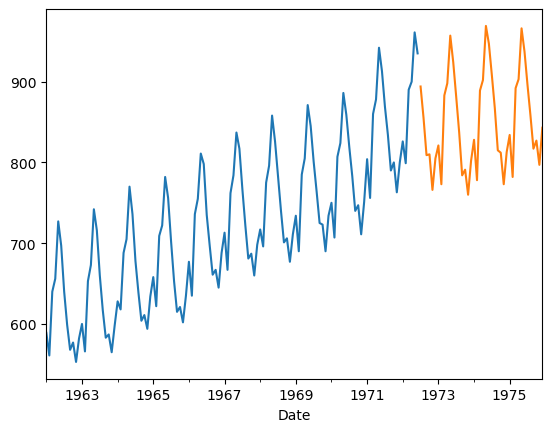

In [23]:
#divide into train and validation set
train = df[:int(0.75*(len(df)))]
valid = df[int(0.75*(len(df))):]

#plotting the data
train['Production'].plot()
valid['Production'].plot()

In [24]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [25]:
model = ARIMA(df['Production'], order = (1,1,1))
model_fit = model.fit()

C:\Users\gawat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gawat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gawat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                  168
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -873.508
Date:                Sun, 20 Aug 2023   AIC                           1753.016
Time:                        04:48:57   BIC                           1762.370
Sample:                    01-01-1962   HQIC                          1756.813
                         - 12-01-1975                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5097      0.886     -0.575      0.565      -2.247       1.228
ma.L1          0.4528      0.938      0.483      0.629      -1.385       2.291
sigma2      2045.3245    354.835      5.764      0.000    1349.861    2740.788
===================================================================================
Ljung-Box (L1) (Q):                   1.42   Jarque-Bera (JB):                12.69
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.56
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

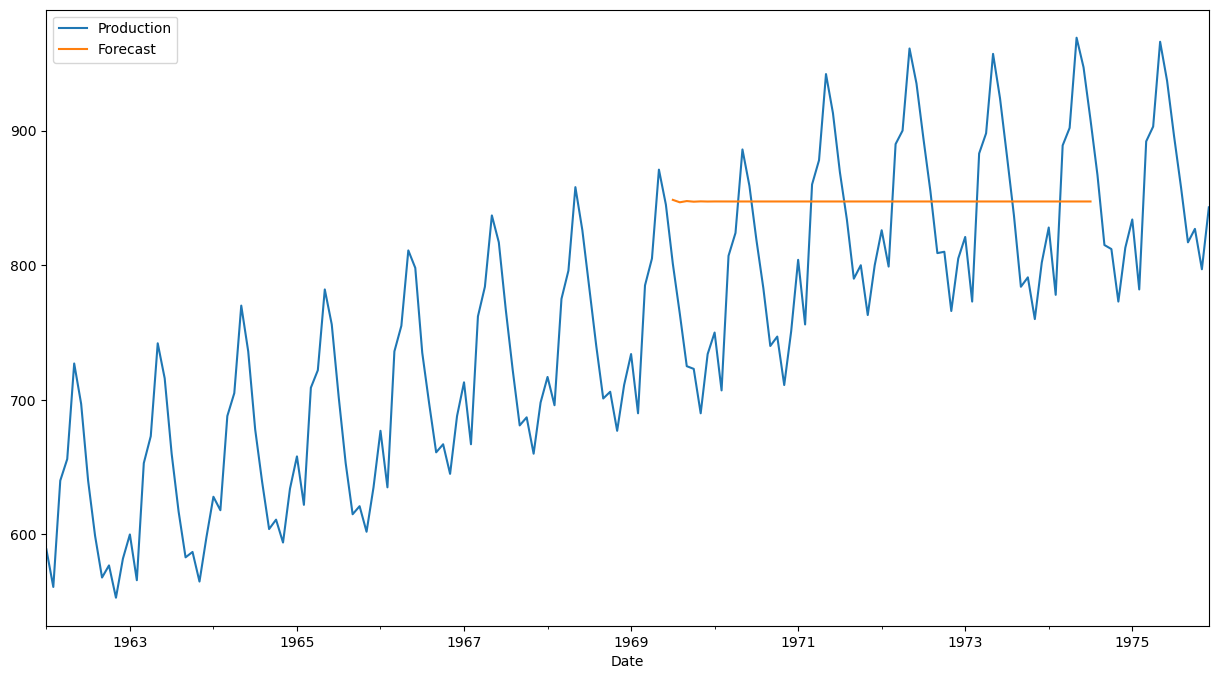

In [27]:
df['Forecast'] = model_fit.predict(start = 90, end = 150, dynamic = True)
df[['Production', 'Forecast']].plot(figsize = (15,8))

In [28]:
import statsmodels.api as sm

In [29]:
model = sm.tsa.statespace.SARIMAX(df['Production'], order = (1,1,1), seasonal_order = (1,1,1,12))
results = model.fit()

C:\Users\gawat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gawat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

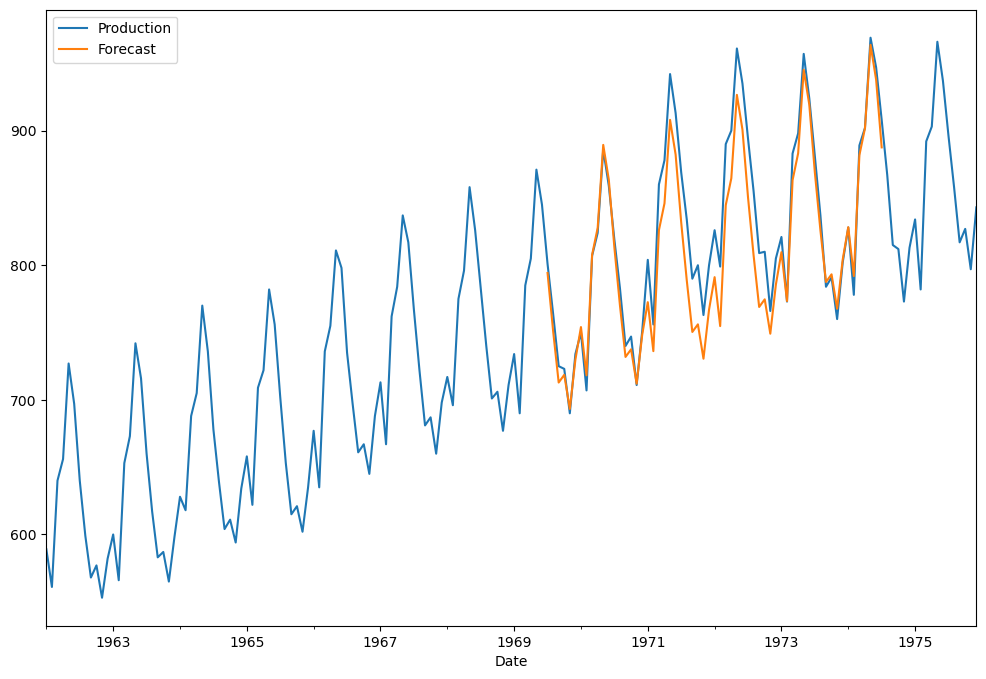

In [30]:
df['Forecast'] = results.predict(start = 90, end = 150, dynamic = True)
df[['Production','Forecast']].plot(figsize = (12,8))

### **Forecasting for 5 years**

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(years=x) for x in range(0,5) ]

In [32]:
future_date_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [33]:
future_date_df.tail()

,Production,Production_diff,Seasonal_diff,Seasonal_diff1,Forecast
1976-12-01,NaN,NaN,NaN,NaN,NaN
1977-12-01,NaN,NaN,NaN,NaN,NaN
1978-12-01,NaN,NaN,NaN,NaN,NaN
1979-12-01,NaN,NaN,NaN,NaN,NaN


In [34]:
futures_df = pd.concat([df, future_date_df], axis = 1)

<Axes: >

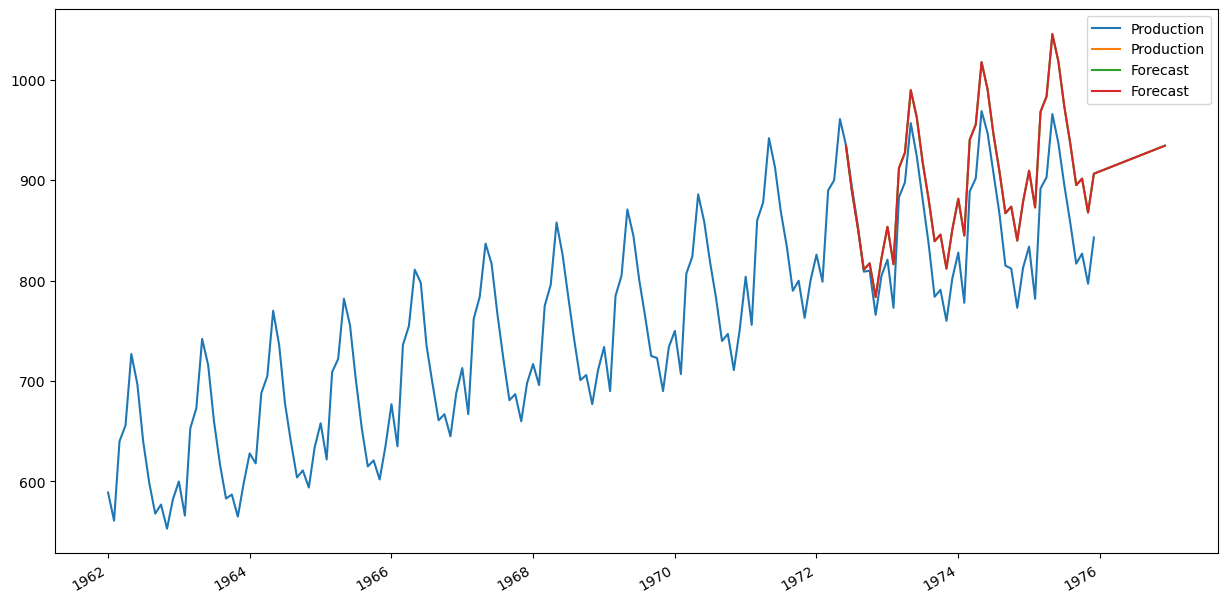

In [35]:
futures_df['Forecast'] = results.predict(start = 125, end = 185, dynamic = True)
futures_df[['Production','Forecast']].plot(figsize = (15,8))